<a href="https://colab.research.google.com/github/surendarmanoj/data-science/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Titanic dataset -> [Titanic dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download)

In [15]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("Titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.shape

(891, 3)

In [ ]:
# Name, Ticket, Passenger ID
# Fare, Age
# Survived

In [6]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [7]:
df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [10]:
df['Age'].fillna(df['Age'].mean().round(2), inplace=True)
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


<ipython-input-12-0117fe7e425c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


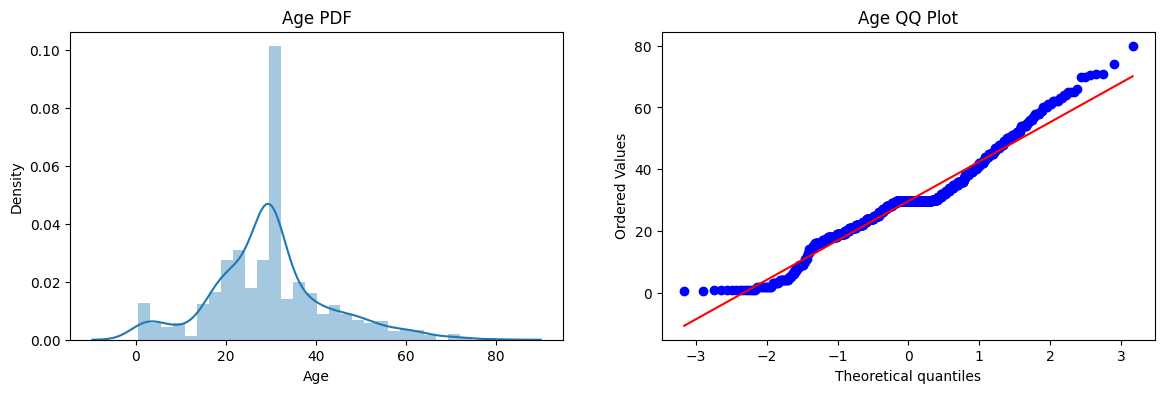

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

<ipython-input-14-72934f248400>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


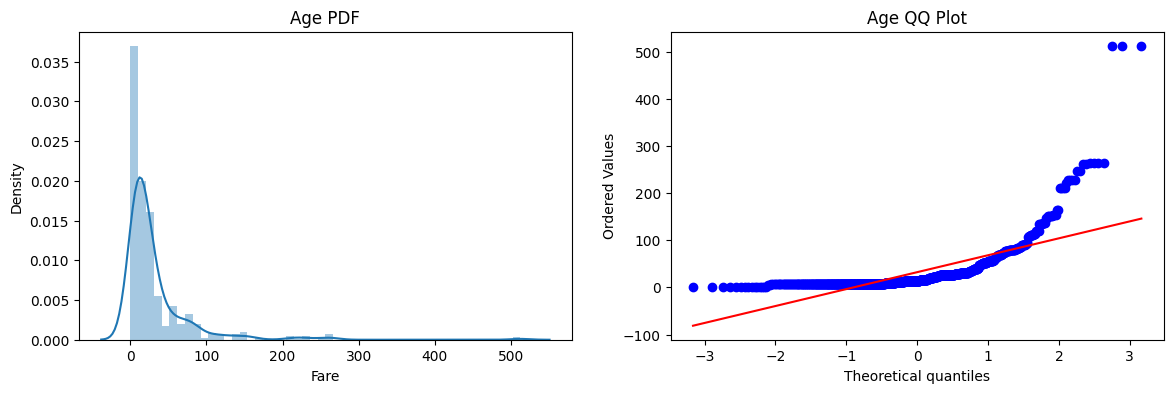

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(df['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [16]:
x = FunctionTransformer(np.log1p)

In [17]:
df_norm = x.fit_transform(df['Fare'])

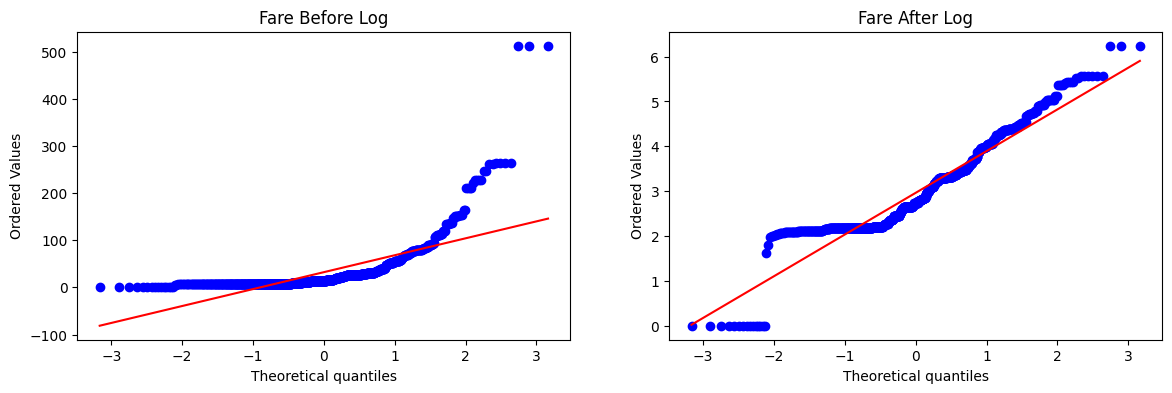

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(df['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(df_norm, dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()